In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('buffedenemies3.db')
data = pd.read_sql_query("SELECT * FROM FEstats", conn)

data.head(5)

,game_number,victory_rank,survival_rank,tactic_rank,units
0,0,F,1,4,Marcus-Guy-Eliwood
1,1,F,1,21,Oswin-Rath-Lyn
2,2,F,3,39,Kent-Guy-Hector
3,3,F,1,5,Guy-Lucius-Lyn
4,4,F,2,6,Sain-Erk-Eliwood


In [2]:
data['victory_rank'].value_counts()

F    36822
S    18510
Name: victory_rank, dtype: int64

([<matplotlib.patches.Wedge at 0x14ecca160>,
 [Text(-0.5464264070924739, 0.9546822411839503, 'F'),
  Text(0.5464264070924738, -0.9546822411839504, 'S')],
 [Text(-0.29805076750498577, 0.5207357679185183, '67%'),
  Text(0.2980507675049857, -0.5207357679185183, '33%')])

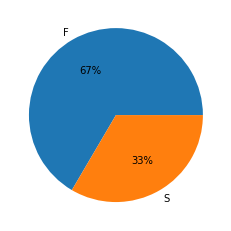

In [3]:
vc = data['victory_rank'].value_counts()
plt.pie(vc, labels=vc.index, autopct='%.0f%%')

<AxesSubplot:xlabel='victory_rank', ylabel='game_number'>

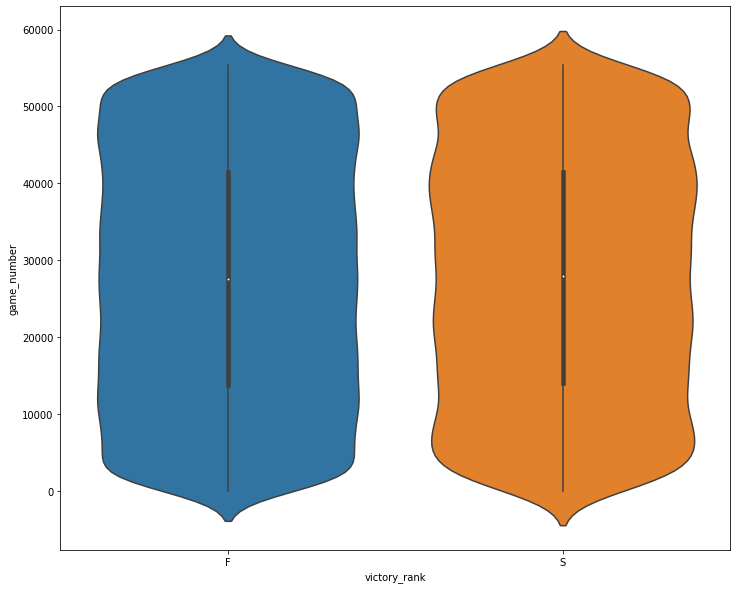

In [5]:
plt.figure(figsize=(12,10))
sns.violinplot(x='victory_rank', y='game_number', data=data)

<AxesSubplot:xlabel='survival_rank', ylabel='game_number'>

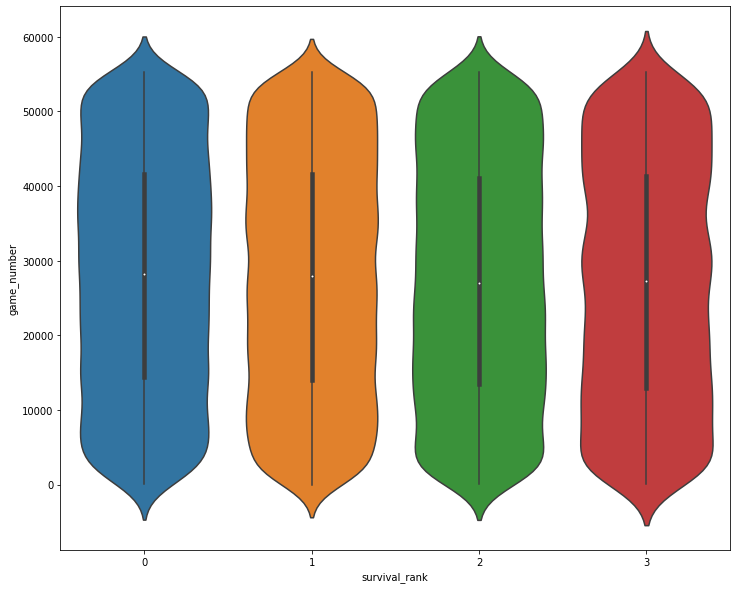

In [6]:
plt.figure(figsize=(12,10))
sns.violinplot(x='survival_rank', y='game_number', data=data)

In [7]:
data['survival_rank'].value_counts()

1    20070
0    13968
2    13901
3     7393
Name: survival_rank, dtype: int64

<AxesSubplot:xlabel='game_number', ylabel='tactic_rank'>

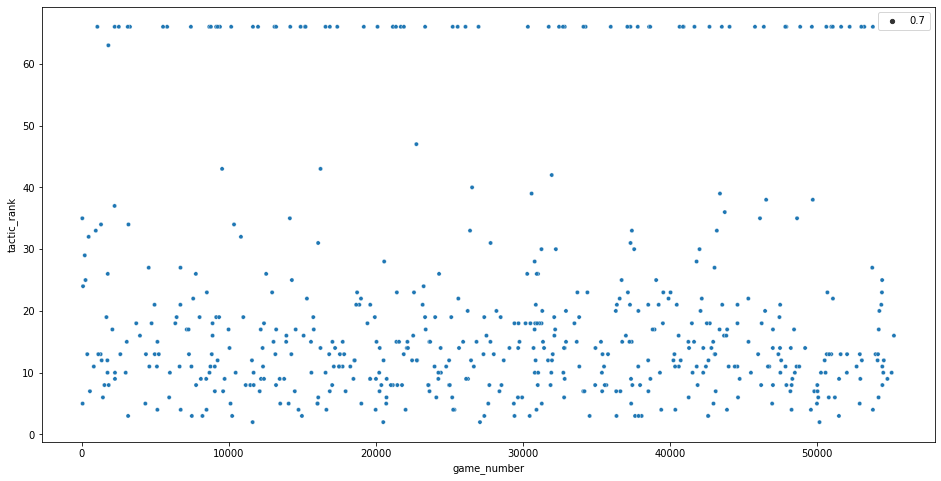

In [8]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='game_number', y='tactic_rank', data=data.sample(frac=0.01), size=0.7)

In [9]:
data[["unit_1", "unit_2", "unit_3"]] = data["units"].str.split(pat="-", expand=True)
data.head(10)

,game_number,victory_rank,survival_rank,tactic_rank,units,unit_1,unit_2,unit_3
0,0,F,1,4,Marcus-Guy-Eliwood,Marcus,Guy,Eliwood
1,1,F,1,21,Oswin-Rath-Lyn,Oswin,Rath,Lyn
2,2,F,3,39,Kent-Guy-Hector,Kent,Guy,Hector
3,3,F,1,5,Guy-Lucius-Lyn,Guy,Lucius,Lyn
4,4,F,2,6,Sain-Erk-Eliwood,Sain,Erk,Eliwood
5,5,S,0,14,Canas-Guy-Hector,Canas,Guy,Hector
6,6,F,3,11,Heath-Bartre-Eliwood,Heath,Bartre,Eliwood
7,7,F,1,5,Raven-Matthew-Hector,Raven,Matthew,Hector
8,8,S,0,10,Sain-Marcus-Lyn,Sain,Marcus,Lyn
9,9,F,3,9,Erk-Kent-Lyn,Erk,Kent,Lyn


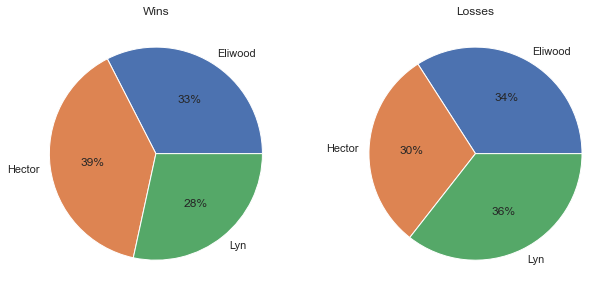

In [10]:
wins = data[data['victory_rank'] == 'S'].value_counts(subset='unit_3').sort_index()
losses = data[data['victory_rank'] == 'F'].value_counts(subset='unit_3').sort_index()

labels = ['Eliwood', 'Hector', 'Lyn']
sns.set_theme()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins, labels=labels, autopct='%.000f%%')
axs[1].pie(losses, labels=labels, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()

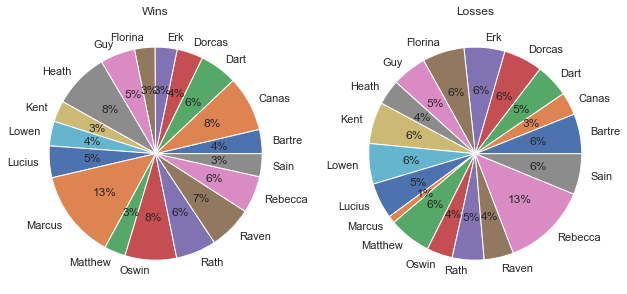

In [11]:
all_wins = data[data['victory_rank'] == 'S']
m_all_wins = pd.melt(all_wins, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])
all_losses = data[data['victory_rank'] == 'F']
m_all_losses = pd.melt(all_losses, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])

wins_count = m_all_wins.value_counts(subset='value').sort_index()
loss_count = m_all_losses.value_counts(subset='value').sort_index()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins_count, labels=wins_count.index, autopct='%.0f%%')
axs[1].pie(loss_count, labels=loss_count.index, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()